# Code to read in StarTrack data from Romagnolo 
Z= 0.0001

In [51]:
import re
import pandas as pd
import numpy as np
import matplotlib as mlp

# To Save Images:
#plt.savefig('foo.png')

# Column names and units
# Descriptions from Belczynski, 2020
column_names = [
    't',    # Age
    'Ka',   # Evolutionary Stage 1
    'Kb',   # Evolutionary Stage 2
    'Ma',   # Mass 1
    'Mb',   # Mass 2
    'a',    # Orbital Separation
    'e',    # Eccentricity
    'ta_end', # (1/2) Age at which the stars collapsed into NS/BH
    'tb_end', # (2/2) 
    'inbin',  # 1 for binary 0 for two single stars
    'a0',     # initial binary separation at ZAMS; initial M1
    'e0',     # initial binary eccentricity at ZAMS; initial M2
    'Mzamsa', 'Mzamsb', 'idum_run', 'iidd_old',
    'Tms', 'Tmr', 'Vsm0_0', 'Vsm0_1', 'Vsm0_2', 'Vsm_0', 'Vsm_1', 'Vsm_2',
    'MpgaA', 'MpgbA', 'KpgaA', 'KpgbA', 'apgA', 'epgA', 'tpgA', 'MendaA', 'dMcea', 'ecssna',
    'MpgaB', 'MpgbB', 'KpgaB', 'KpgbB', 'apgB', 'epgB', 'tpgB', 'MendbB', 'dMceb', 'ecssnb',
    'aspina', 'aspinb', 'aspina0', 'aspinb0', 'i0', 'iA', 'iB', 'Mcoa', 'Mcob',
    'twra', 'awra', 'ewra', 'Mwra', 'Mcoma', 'twrb', 'awrb', 'ewrb', 'Mwrb', 'Mcomb',
    'a_0', 'e_0', 'i_0', 'Om_0', 'om_0', 'tau_0', 'a_0a', 'e_0a', 'i_0a', 'Om_0a', 'om_0a', 'tau_0a',
    'a_1', 'e_1', 'i_1', 'Om_1', 'om_1', 'tau_1', 'a_2', 'e_2', 'i_2', 'Om_2', 'om_2', 'tau_2',
    'jx0', 'jy0', 'jz0', 'jx1', 'jy1', 'jz1', 'jx2', 'jy2', 'jz2',
    'ttms1a', 'tthg1a', 'ttrgb1a', 'ttcheb1a', 'ttagb1a', 'tthems1a', 'tthehg1a', 'tthergb1a',
    'ttms1b', 'tthg1b', 'ttrgb1b', 'ttcheb1b', 'ttagb1b', 'tthems1b', 'tthehg1b', 'tthergb1b',
    'k', 'evo_track'
]

raw_column_units = [ # Units for the columns
    'Myr', '#', '#', 'Msun', 'Msun', 'Rsun', '#', 'Myr', 'Myr', 'Myr',
    'Rsun', '#', 'Msun', 'Msun', '#', '#',
    'Myr', 'Myr', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day', 'Rsun/day',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    'Msun', 'Msun', '#', '#', 'Rsun', '#', 'Myr', 'Msun', 'Msun', '#',
    '#', '#', '#', '#', 'rad', 'rad', 'rad', 'Msun', 'Msun',
    'Myr', 'Rsun', '#', 'Msun', 'Msun', 'Myr', 'Rsun', '#', 'Msun', 'Msun',
    'Rsun', '#', 'rad', 'Om_0', 'om_0', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Rsun', '#', 'rad', 'Om_1', 'om_1', 'Myr', 'Rsun', '#', 'rad', 'rad', 'rad', 'Myr',
    'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day', 'Msun*Rsun^2/day',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
    'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr', 'Myr',
    '#'
]

def parse_dat_file_to_dataframe(filepath):
    with open(filepath, 'r') as f:
        content = f.read()

    # Split each data row by blank lines
    blocks = re.split(r'\n\s*\n', content.strip())
    parsed_rows = []

    for block in blocks:
        lines = block.strip().split('\n')
        if not lines:
            continue

        values = []
        for line in lines[:-1]:
            tokens = line.strip().split()
            for token in tokens:
                try:
                    values.append(float(token))
                except ValueError:
                    values.append(np.nan)

        # Final line = label as a single string
        evo_track = lines[-1].strip()
        values.append(evo_track)

        # Pad or truncate
        if len(values) < len(column_names):
            values += [np.nan] * (len(column_names) - len(values))
        values = values[:len(column_names)]

        parsed_rows.append(values)

    df = pd.DataFrame(parsed_rows, columns=column_names)

    # Store units as metadata
    df.attrs["units"] = dict(zip(column_names, raw_column_units))
    return df



# Graphing the data

In [52]:
# lines that you will have to change 
path = '/Users/feran/Documents/StarTrack/jul_28/ST_ouput/ST_ouput/m1.5/' # you will have to change this to your local folder
# filepath = "/mnt/data/example_file_startrack.dat"
file_name = 'compact_0001.dat' # example of one of the files (but we can change this)

In [53]:
# read in the data 

filepath = path+file_name
df = parse_dat_file_to_dataframe(filepath)

print(df.head())

# example for how to obtain units 
print("\nUnits for Ma:", df.attrs["units"]['Ma'])
# df.to_csv("parsed_startrack_data.csv", index=False)


# filepath = path+file_name
# df = parse_dat_file_to_dataframe(filepath)

# # Show a sample
# print(df.head())




          t    Ka    Kb         Ma         Mb              a         e  \
0  5.685658  14.0  14.0  39.039574  23.306562     316.183116  0.003818   
1  5.732926  14.0  14.0  16.341111  16.114380    6977.586244  0.009113   
2  5.899358  14.0  14.0  33.645150  18.009124   10525.245460  0.007576   
3  3.875996  14.0  14.0  48.715149  40.896470  101673.257860  0.565840   
4  4.272228  14.0  14.0  43.191597  47.530079   20490.339418  0.162982   

     ta_end    tb_end  inbin  ...    ttms1b    tthg1b  ttrgb1b  ttcheb1b  \
0  3.836530  5.685657    1.0  ...  5.295223  5.299019     -1.0  5.485724   
1  5.681121  5.732925    1.0  ...  5.243114  5.249347     -1.0  5.666209   
2  4.078307  5.899357    1.0  ...  5.446242  5.451573     -1.0  5.817366   
3  3.721754  3.875995    1.0  ...  3.551277  3.553047     -1.0  3.867888   
4  3.518585  4.272227    1.0  ...  3.957537  3.959322     -1.0  4.263866   

    ttagb1b  tthems1b  tthehg1b  tthergb1b  \
0 -1.000000  5.683521 -1.000000       -1.0   
1 -1.0

In [54]:
# Plot some data 

# print(df['col_0']) # these are the final compact object masses 
M1 = df['Ma'].values # 'final mass of star 1 that was the more massive one on ZAMS in [Msun]'
print(M1)

M2 = df['Mb'].values ## 'final mass of star 1 that was the more massive one on ZAMS in [Msun]' [double check]
print(M2)

zamsA = df['Mzamsa'].values
zamsB = df['Mzamsb'].values


[39.039574 16.341111 33.64515  ... 27.325456 23.325942 38.093957]
[23.306562 16.11438  18.009124 ... 19.431585 17.030904 18.839256]


## let's do some plotting 

In [55]:
import matplotlib.pyplot as plt

# Mass 1

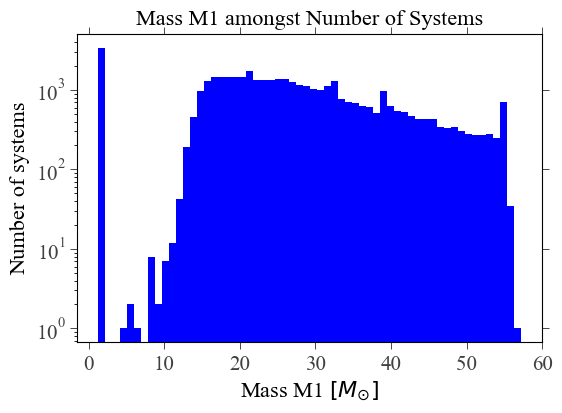

In [56]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax= plt.subplots(ncols=1,nrows=1, figsize=(6,4))
ax.hist(M1, bins=60, color= 'blue')

ax.set_xlabel('Mass M1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Number of systems', fontsize=16)
ax.set_yscale('log')

ax.set_title('Mass M1 amongst Number of Systems', fontsize=16, pad=7)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)
plt.savefig('massM1_0001.png', bbox_inches='tight')

plt.show()

# Mass 2

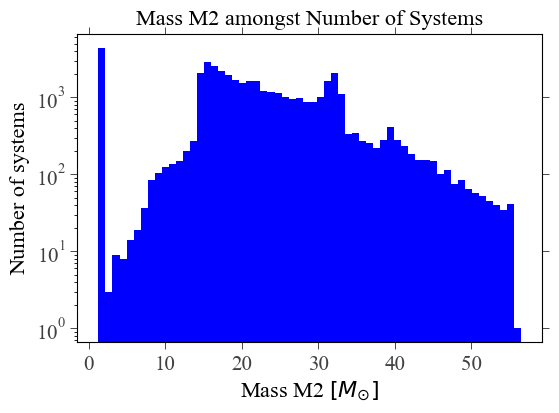

In [57]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
ax.hist(M2, bins = 60, color = 'blue')
ax.set_xlabel('Mass M2 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Number of systems', fontsize=16)
ax.set_yscale('log')
ax.set_title('Mass M2 amongst Number of Systems', fontsize=16, pad=7)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.savefig('massM2_0001.png', bbox_inches='tight')
plt.show()

# Compact Merger Information

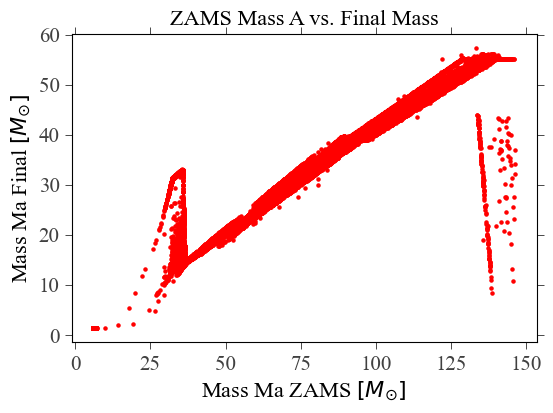

In [58]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
plt.scatter(x=zamsA, y=M1, s=5, color= 'red')

ax.set_xlabel('Mass Ma ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Ma Final $[M_{\odot}]$', fontsize=16)
ax.set_title('ZAMS Mass A vs. Final Mass', fontsize = 16, pad=7)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.savefig('zamsMAnfinal_0001.png', bbox_inches='tight')
plt.show()

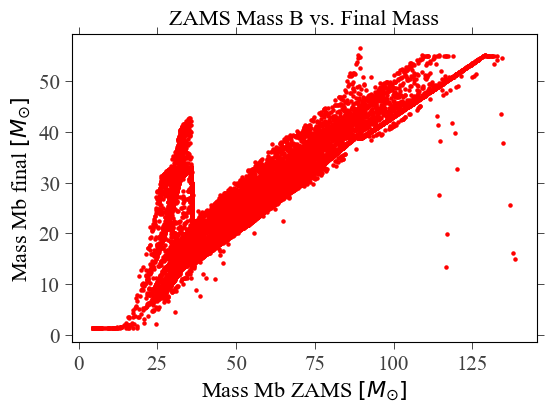

In [59]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
plt.scatter(x=zamsB, y=M2, s=5, color= 'red')

ax.set_xlabel('Mass Mb ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Mb final $[M_{\odot}]$', fontsize=16)
ax.set_title('ZAMS Mass B vs. Final Mass', fontsize = 16, pad=7)

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.savefig('zamsMBnfinal_0001.png', bbox_inches='tight')
plt.show()

In [60]:
# INCLUDE ZAMS MASS B VS FINAL MASS

# Mass 1 vs. Mass 2

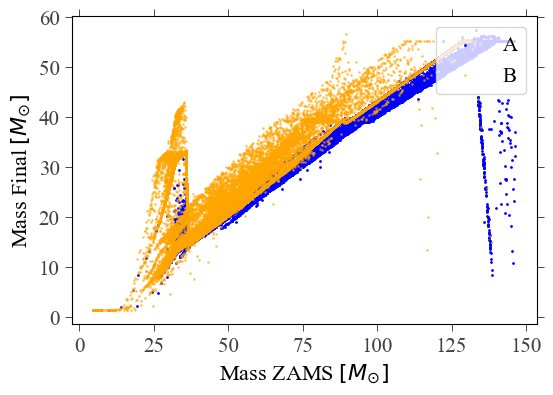

In [61]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))

plt.scatter(x=zamsA, y=M1, s=1, c='b', label = "A") 
plt.scatter(x=zamsB, y=M2, s=1, c='orange', label = "B", alpha = 0.5)

ax.set_xlabel('Mass ZAMS $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Final $[M_{\odot}]$', fontsize=16)
#ax.set_title('Mass ZAMS vs. Final Mass')

ax.legend(loc='upper right', ncols=1, fontsize = 15) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.savefig('zamsnfinal_0001.png', bbox_inches='tight')
plt.show()

# Adding error bars from data on website and ZAMS(A)

# Simulated Black Hole Masses 1&2

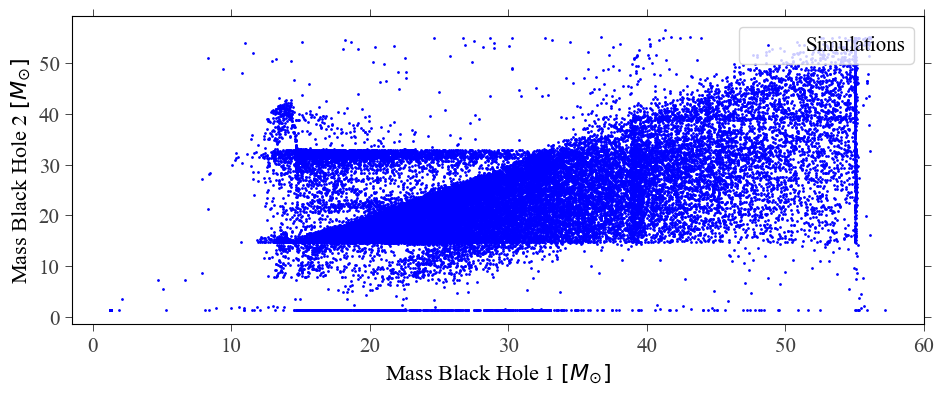

In [62]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(11,4))

plt.scatter(x=M1, y=M2, s=1, c='b', label = "Simulations") 
# plt.scatter(x=zamsB, y=M2, s=1, c='orange', label = "B", alpha = 0.5)

ax.set_xlabel('Mass Black Hole 1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Black Hole 2 $[M_{\odot}]$', fontsize=16)
#ax.set_title('Mass ZAMS vs. Final Mass')


ax.legend(loc='upper right', ncols=1, fontsize = 15) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 16, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)

plt.savefig('simulatedmasses_0001.png', bbox_inches='tight')
plt.show()

# Adding error bars from data on website and ZAMS(A)

In [63]:
# Include the error bar plots with this plot ^ 

In [64]:
# checking if binaries merger within 13.6 billion years to become binary sources or not
# Pair instability leading to the lines towards the end

# Adding error bars (LIGO Observations)

In [65]:
import pandas as pd        # Redid the modules to avoid rerunning from the top
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

In [66]:
# retrieve events.csv path + csv file found on GWOSC
path2 = '/Users/feran/Documents/StarTrack/summer_proj/more_data/' # you will have to change this to your local folder

# filepath = "/mnt/data/example_file_startrack.dat"
file_name2 = 'events2.csv' # example of one of the files (but we can change this)
filepath2 = path2+file_name2

In [67]:
df = pd.read_csv(filepath2)
df.head() # Displaying file information

,name,shortName,gps,version,catalog,doi,detail_url,mass_1_source,mass_1_source_lower,mass_1_source_upper,...,redshift_upper,far,far_lower,far_upper,p_astro,p_astro_lower,p_astro_upper,final_mass_source,final_mass_source_lower,final_mass_source_upper
0,GW200316_215756,GW200316_215756-v1,1268431094,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW2003...,13.1,-2.9,10.2,...,0.08,0.000010,NaN,NaN,0.99000,NaN,NaN,20.2,-1.9,7.4
1,GW200311_115853,GW200311_115853-v1,1267963151,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW2003...,34.2,-3.8,6.4,...,0.05,0.000010,NaN,NaN,0.99000,NaN,NaN,59.0,-3.9,4.8
2,GW200306_093714,GW200306_093714-v1,1267522652,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW2003...,28.3,-7.7,17.1,...,0.24,24.000000,NaN,NaN,0.81156,NaN,NaN,41.7,-6.9,12.3
3,GW200302_015811,GW200302_015811-v1,1267149510,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW2003...,37.8,-8.5,8.7,...,0.16,0.110000,NaN,NaN,0.90643,NaN,NaN,55.5,-6.6,8.9
4,GW200225_060421,GW200225_060421-v1,1266645879,1,GWTC-3-confident,https://doi.org/10.7935/b024-1886,https://gwosc.org/api/v2/event-versions/GW2002...,19.3,-3.0,5.0,...,0.09,0.000011,NaN,NaN,0.99000,NaN,NaN,32.1,-2.8,3.5


In [68]:
# Initial masses 
totMassLIGO= df['total_mass_source'].values

# Final masses of merged bodies
fmassLIGO = df['final_mass_source'].values             # Mass
fmassLIGO_lower = df['final_mass_source_lower'].values # Mass Lower
fmassLIGO_upper = df['final_mass_source_upper'].values # Mass Upper

# read in LIGO data
mass_1 = df['mass_1_source'].values
mass_2 = df['mass_2_source'].values

negative_mass_1_lower = df['mass_1_source_lower'].values
negative_mass_2_lower = df['mass_2_source_lower'].values

mass_1_lower = [-x for x in negative_mass_1_lower]
mass_2_lower = [-x for x in negative_mass_2_lower]

mass_1_upper = df['mass_1_source_upper'].values
mass_2_upper = df['mass_2_source_upper'].values

revfmassLIGO_lower = [-x for x in fmassLIGO_lower]     # Mass lower but the negative value removed B)
print(revfmassLIGO_lower)

[1.9, 3.9, 6.9, 6.6, 2.8, 4.8, 11.0, 31.0, 7.8, 13.0, 4.3, 8.9, 26.0, 6.4, 0.66, 3.2, 11.0, 1.7, 4.3, 11.0, 9.9, 2.7, 0.93, 4.1, 0.93, 7.5, 1.2, 21.0, 2.0, 10.0, 15.0, 1.2, 1.7, 2.0, 14.6, 11.8, 2.6, 0.9, 2.9, 12.6, 5.0, 8.6, 4.3, 4.0, 1.3, 13.2, 7.6, 10.8, 1.4, 7.3, 1.8, 2.0, 11.1, 2.1, 1.2, 15.9, 8.9, 4.5, 12.4, 13.9, 8.5, 5.4, 16.0, 12.9, 9.4, 11.5, 6.6, 3.4, 7.9, 33.6, 9.0, 11.5, 7.3, 4.5, 2.9]


In [69]:
print("The Detected Total Masses: \n",
      totMassLIGO)
print("The Final Masses: \n",
      fmassLIGO)

The Detected Total Masses: 
 [ 21.2   61.9   43.9   57.8   33.5   72.3   67.   148.    65.    81.
  27.    62.6   63.    65.3   17.58  63.3   75.     7.4   63.9   86.
  79.    32.3   19.8   43.3   20.19  47.1   17.5   80.    20.7   34.5
 112.    18.5   20.    21.2   93.3   61.9   36.7   13.9   11.8   68.
  57.2   78.    34.3   57.2   25.9   76.7   65.    70.7   20.7   68.8
  18.3   21.8   57.2   31.4   20.1  112.6   94.3   59.4   92.7  115.6
  58.1   76.3  153.1  105.6   64.1   69.3   54.4   35.8   69.4  182.3
  73.6   81.3   58.    36.8   43.4 ]
The Final Masses: 
 [ 20.2   59.    41.7   55.5   32.1   68.7   64.   141.    62.2   78.
  26.7   59.9   61.    62.5   16.76  60.2   71.     7.2   60.8   82.
  75.5   32.2   18.87  41.4   19.18  45.    16.8   76.    19.6   34.
 107.    17.6   19.    20.2   90.3   59.6   34.9   13.3   11.6   65.
  54.7   74.4   33.    54.3   25.7   72.4   62.1   67.4   19.7   65.4
  17.6   20.8   54.5   30.1   19.2  107.3   90.2   56.6   88.   110.5
  55.5   72

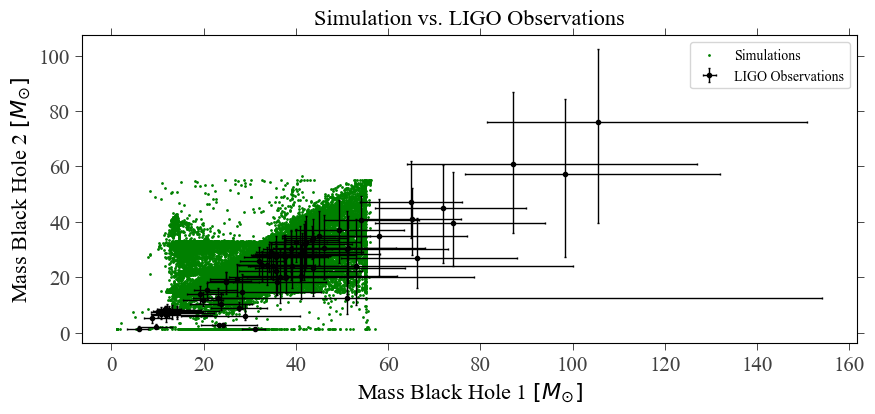

In [70]:
plt.rcParams["font.family"] = "Times New Roman"  # Font

f, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,4))

ax.scatter(x=M1, y=M2, s=1, c='g', label = "Simulations") 

ax.set_xlabel('Mass Black Hole 1 $[M_{\odot}]$', fontsize=16)
ax.set_ylabel('Mass Black Hole 2 $[M_{\odot}]$', fontsize=16)
# ax.set_yscale('log')
asymmetric_error_mass_1 = [mass_1_lower, mass_1_upper]
asymmetric_error_mass_2 = [mass_2_lower, mass_2_upper]

ax.errorbar(x=mass_1, y=mass_2, xerr=asymmetric_error_mass_1, yerr=asymmetric_error_mass_2, fmt='o', label='LIGO Observations', capsize =1, elinewidth=1, markersize=3, color='black')

ax.legend(loc='upper right', ncols=1, fontsize = 10) # Displays the labels of each line on the graph

# Formatting x and y axis ticks
ax.tick_params(axis='both', which='major', labelsize= 15, width=1, length=5, top = True)
ax.tick_params(which='major', width=.5, length=5, labelsize=15, labelcolor='0.25', right = True)
ax.set_title("Simulation vs. LIGO Observations", fontsize= 16, pad=8)
ax.margins(tight=True)

plt.savefig('simulationsnobservations_0001.png', bbox_inches='tight')
plt.show()

# Adding error bars from data on website and ZAMS(A)

In [71]:
# Upper mass gap
# Pair instability supernova
# Explain we think it's formed another way 
# The larger bh- bh 1; smaller bh-bh2

# Masking housekeeping

In [72]:
x = np.asarray([2,4,6,1,2,4,5,6])
print("x=",list(x))
y = np.asarray([5,3,2,1,7,11,3,2])
print("y=",list(y))

mask = (x>=y)
print(list(mask))

x= [2, 4, 6, 1, 2, 4, 5, 6]
y= [5, 3, 2, 1, 7, 11, 3, 2]
[False, True, True, True, False, False, True, True]


In [46]:
biggest_xy = np.zeros_like(x)
print(biggest_xy)        # Returns an array of zeros

biggest_xy[mask] = x[mask]
print(biggest_xy[mask])  # Prints all the true values 

biggest_xy[mask] = y[mask]
print(biggest_xy[mask])  # Prints all the false values

biggest_xy[~mask] = y[~mask]
print(biggest_xy)

[0 0 0 0 0 0 0 0]
[4 6 1 5 6]
[3 2 1 3 2]
[ 5  3  2  1  7 11  3  2]


# Masking with the LIGO Data

The mass of the first black hole should always be larger than the second black hole. Removes any second black hole that needs to be changed

In [47]:
# The mass of the first black hole should always be larger than the second black hole

In [48]:
mask = mass_1>=mass_2
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
